In [1]:
import pandas as pd

iris = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

iris.columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
iris.dropna(how="all", inplace=True) # drops the empty line at file-end

iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# split data table into data X and class labels y

X = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [22]:
pca2 = PCA(n_components=2)
pca = PCA()

We now have to scale and center. Then perform the PCA.

In [23]:
X_std = StandardScaler().fit_transform(X)
pca.fit(X_std)
pca2.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

We now compute the explained variance for each component. This is the cumulative standardized eigen values.

In [24]:
print(pca.explained_variance_ratio_) 

[ 0.72770452  0.23030523  0.03683832  0.00515193]


In [25]:
print(pca2.explained_variance_ratio_) 

[ 0.72770452  0.23030523]


In [86]:
print(pca.components_) 

[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
 [-0.26199559  0.12413481  0.80115427 -0.52354627]]


In [87]:
print(pca2.components_) 

[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]


In [94]:
X_pca = pca2.fit_transform(X_std)

In [28]:
print(X_pca)

[[ -2.26454173e+00   5.05703903e-01]
 [ -2.08642550e+00  -6.55404729e-01]
 [ -2.36795045e+00  -3.18477311e-01]
 [ -2.30419716e+00  -5.75367713e-01]
 [ -2.38877749e+00   6.74767397e-01]
 [ -2.07053681e+00   1.51854856e+00]
 [ -2.44571134e+00   7.45626750e-02]
 [ -2.23384186e+00   2.47613932e-01]
 [ -2.34195768e+00  -1.09514636e+00]
 [ -2.18867576e+00  -4.48629048e-01]
 [ -2.16348656e+00   1.07059558e+00]
 [ -2.32737775e+00   1.58587455e-01]
 [ -2.22408272e+00  -7.09118158e-01]
 [ -2.63971626e+00  -9.38281982e-01]
 [ -2.19229151e+00   1.88997851e+00]
 [ -2.25146521e+00   2.72237108e+00]
 [ -2.20275048e+00   1.51375028e+00]
 [ -2.19017916e+00   5.14304308e-01]
 [ -1.89407429e+00   1.43111071e+00]
 [ -2.33994907e+00   1.15803343e+00]
 [ -1.91455639e+00   4.30465163e-01]
 [ -2.20464540e+00   9.52457317e-01]
 [ -2.77416979e+00   4.89517027e-01]
 [ -1.82041156e+00   1.06750793e-01]
 [ -2.22821750e+00   1.62186163e-01]
 [ -1.95702401e+00  -6.07892567e-01]
 [ -2.05206331e+00   2.66014312e-01]
 

In [66]:
X_pca[0,0]

-2.2645417283949021

In [69]:
iris_transform=pd.DataFrame(X_pca)
iris_transform.columns=['PC1', 'PC2']
iris_pca=iris_transform.join(iris['Species'])

In [70]:
iris_pca.tail()

,PC1,PC2,Species
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica
149,0.959299,-0.022284,Iris-virginica


In [71]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
sns.set(style="white", color_codes=True)

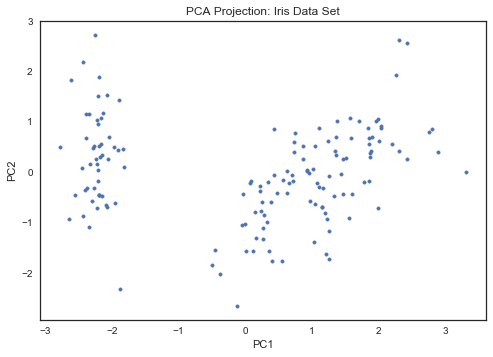

In [78]:
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:,1], marker='.')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection: Iris Data Set')
plt.show()

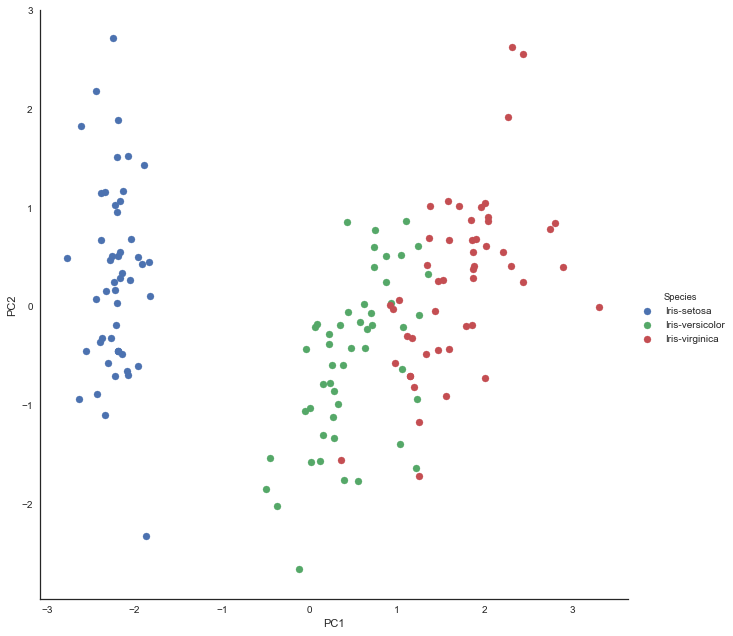

In [85]:
sns.FacetGrid(iris_pca, hue="Species", size=9) \
   .map(plt.scatter, "PC1", "PC2") \
   .add_legend() 
plt.show()